### Моделирование по колебаниям: "Выпрямление с фильтрацией"

##### Петренко Людмила, Кусайкина Елизавета М32041

In [1]:
import numpy as np
from matplotlib import pyplot as plt

#### Описание работы:
Выпрямление - способ получения постоянного тока, например, для питания радиотехнических устройств.

Объект выпрямления - электрическое напряжение переменного тока.

Цель фильтрации при выпрямлении - ослабить переменную составляющую выпрямленного напряжения.

В этой работе требовалось cмоделировать работу фильтравыпрямителя. На входе фильтра действует напряжение E(t) одно- или двухполупериодное, полученное из переменного синусоидального напряжения. Для ослабления переменной составляющей в схеме фильтра имеется реактивный элемент: конденсатор емкостью С. Фильтр работает на нагрузку сопротивлением Rн.

![alt text](straightening_schem.png "Title")

In [146]:
r = 0.1 # Внутреннее сопротивление источника напряжения
R = 10.0 # Сопротивление нагрузки
C = 100.0 # Емкость конденсатора

На входе может действовать:

E_one - однополупериодное выпрямленное напряжение, $E(t) = \sin(t) $, при $\sin(t) > 0 $ иначе $E(t) = 0 $ 

E_two - двухполупериодное выпрямленное напряжение, $E(t) = |\sin(t)| $

In [159]:
def E_one_draw(t):
    u_list = []
    for i in t:
        if np.sin(i) > 0:
            u_list.append(np.sin(i))
        else:
            u_list.append(0)
    return u_list
    
def E_one(t):
    if np.sin(t) > 0:
        return np.sin(t)
    else:
        return 0

E_two = lambda t : abs(np.sin(t))

Выходное, выпряпленное напряжение можно рассчитать с помощью дифференциального уравнения, описывающего работу фильтра:

$\displaystyle \frac{\partial u(t)}{\partial t}$ = $\frac{1}{rC} $ [$E(t) $ - (1 + $\frac{r}{R} $) $u(t) $]

$u(0) = 0$ - начальное условие

Решим задачу Коши:

<blockquote> 1. Запишем задачу Коши в удобном для работы виде

Пусть $w = $ - $\frac{1}{rC} $ - $\frac{1}{RC} $ и $p = \frac{1}{rC} $

$\displaystyle \frac{\partial u(t)}{\partial t}$ = $wu(t) + pE(t) $ , $u(0) = 0 $ => $f(t, u) = wu + pE(t) $
</blockquote>

<blockquote> 2. Воспользуемся методом Рунге-Кутта для нахождения приближенного решения дифференциального уравнения

$U_{i+1} = U_i + hf(t_i + \frac{h}{2}, U_i + \frac{h}{2}f(t_i, U_i)) $, $i = 0..N $

$U_0 = 0 $
</blockquote>

In [156]:
w = -1/(r*C) - 1/(C*R)
p = 1/(r*C)

f_one = lambda t, u : w*u + p*E_one(t)
f_two = lambda t, u : w*u + p*E_two(t)

t = np.linspace(0, 20*np.pi, 1000)
def U_i(i, f, U):
    h = t[i+1] - t[i]
    return U[i] + h*f(t[i] + h/2, U[i] + (h/2)*f(t[i], U[i]))

U_one = []
U_one.append(0)
U_two = []
U_two.append(0)
for i in range(999):
    U_one.append(U_i(i, f_one, U_one))
    U_two.append(U_i(i, f_two, U_two))

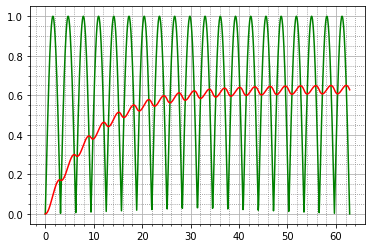

In [157]:
plt.minorticks_on()
plt.grid(True, which='both')
plt.grid(which='minor', color='gray', linestyle=':')

plt.plot(t, E_two(t), color='green', label="U(t)")
plt.plot(t, U_two, color='red', label="U(t)")

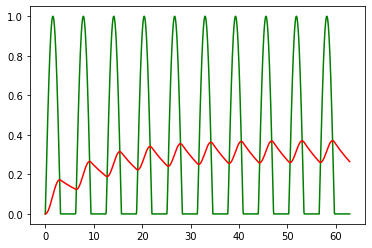

In [160]:
plt.plot(t, E_one_draw(t), color='green', label="U(t)")
plt.plot(t, U_one, color='red', label="U(t)")